In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [11]:
class LDA:
    def __init__(self, n_components = 0): #since the matrix M will have at most rank p-1 --> p-1 non zero eigenvalue = p-1 non zero eigenvector
                                          #--> at most p-1 linear disciminant direction
        self.n_components = n_components
        self.LD = None

    def fit(self, X_data, y_target):
        n_sample,n_feature = X_data.shape
        group = np.unique(y_target)
        tot_mean = np.mean(X, axis=0)
        W = np.zeros([n_feature, n_feature])
        B = np.zeros([n_feature, n_feature])
        for i in group:
            X_i = X_data[y==group[i]]
            n_i = len(X_i)
            #covariance within groups
            covariance_matrix_i = np.cov(X_i.T)
            W += (n_i - 1) * covariance_matrix_i 
            #variannce between groups
            mean_i = np.mean(X_i, axis=0)
            mean_difference_i = (mean_i - tot_mean).reshape(n_feature, 1)
            B += n_i * (mean_difference_i).dot(mean_difference_i.T)

        #now calulate the matrix M
        M = np.linalg.inv(W).dot(B)
        eigenvalues, eigenvectors = np.linalg.eig(M)
        eigenvectors = eigenvectors.T
        #now as in PCA the Discriminant direcction are gonna be the p-1 eigenvector corresponding to the 
        #p-1 bigger eigenvalues
        sort_index = np.argsort(abs(eigenvalues))[::-1]
        if self.n_components == 0:
            self.LD = eigenvectors[:(n_feature-1)]    
        else :
            self.LD = eigenvectors[:self.n_components]
        
    def project(self,X):
        X_projected = np.dot(X, self.LD.T)

        return X_projected

        

Shape of X: (150, 4)
Shape of transformed X: (150, 3)


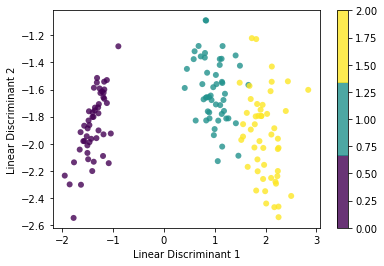

In [12]:
data = datasets.load_iris()
X = data.data
y = data.target

lda = LDA()
lda.fit(X, y)
X_projected = lda.project(X)



print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
data = datasets.load_iris()
X = data.data
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()